In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline 
%precision 5

'%.5f'

## Txt mesh file reader

In [8]:
# reading the new mesh file 
meshfile = open("disk_mesh.txt",'r').readlines()
n_node = int(meshfile[1])
node_x = np.zeros((n_node,2))
for i in range(n_node):
    aux = meshfile[2+i].split()
    node_x[i,0] = float(aux[0])
    node_x[i,1] = float(aux[1])
n_elem = int(meshfile[3+n_node])
elements = np.zeros((n_elem,4),dtype=int)
for i in range(n_elem):
    aux = meshfile[4+n_node+i].split()
    elements[i,0] = int(aux[0])
    elements[i,1] = int(aux[1])
    elements[i,2] = int(aux[2])
    elements[i,3] = int(aux[3])
#n_boundary_n = int(meshfile[5+n_node+n_elem])
#boundary_n = np.zeros((n_boundary_n),dtype=int)
#for i in range(n_boundary_n):
#    aux = int(meshfile[6+n_node+n_elem+i])
#    boundary_n[i] = aux
#n_boundary_e = int(meshfile[7+n_node+n_elem+n_boundary_n])
#boundary_e = np.zeros((n_boundary_e,2),dtype=int)
#for i in range(n_boundary_e):
#    aux = meshfile[8+n_node+n_elem+n_boundary_n+i].split()
#    boundary_e[i,0] = int(aux[0])
#    boundary_e[i,1] = int(aux[1])
#print(node_X)
#print(elements)
print(n_node)
print(n_elem)
#print(n_boundary_n)
#print(n_boundary_e)

474
441


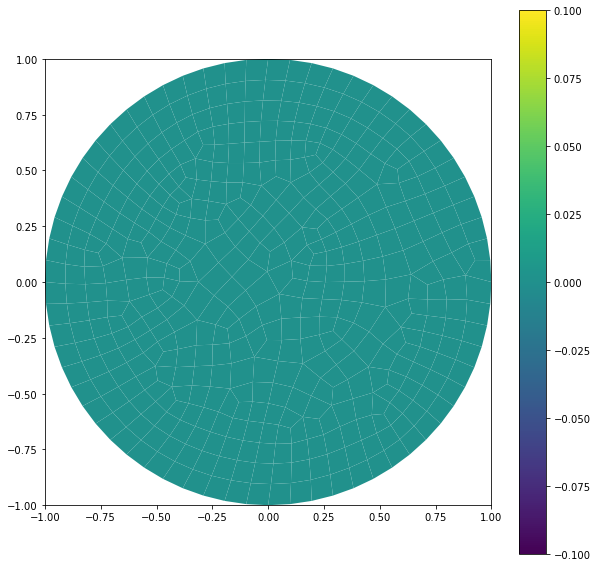

In [10]:
## PLOT mesh
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,10))
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_aspect('equal')
patches1 = []
colors1 = np.zeros((n_elem))
for i in range(n_elem):
    n1 = elements[i,0]
    n2 = elements[i,1]
    n3 = elements[i,2]
    n4 = elements[i,3]
    polygon = Polygon([node_x[n1],node_x[n2],node_x[n3],node_x[n4]], closed=True)
    patches1.append(polygon)
    colors1[i] = 0.0
p1 = PatchCollection(patches1)
p1.set_array(colors1)
ax1.add_collection(p1)
plt.colorbar(p1,ax=ax1)
#ax1.scatter(node_x[boundary_n,0],node_x[boundary_n,1])

## Inp mesh file reader

In [31]:
# reading the new mesh file 
meshfile = open("disk_mesh.inp",'r').readlines()
for line in meshfile:
    if line.find("*Node") != -1:
        i_node_start = meshfile.index(line) + 1
    if line.find("*Element") != -1:
        i_node_end = meshfile.index(line) - 1
        i_elem_start = meshfile.index(line) + 1
    if line.find("*End Part") != -1:
        i_elem_end = meshfile.index(line) - 1
#print(i_node_start,i_node_end,i_elem_start,i_elem_end)

n_node = i_node_end - i_node_start + 1
node_x = np.zeros((n_node,2))
for i in range(n_node):
    aux = meshfile[i_node_start+i].split(',')
    node_x[i,0] = float(aux[1])
    node_x[i,1] = float(aux[2])
n_elem = i_elem_end - i_elem_start + 1
elements = np.zeros((n_elem,4),dtype=int)
for i in range(n_elem):
    aux = meshfile[i_elem_start+i].split(',')
    elements[i,0] = int(aux[1]) - 1
    elements[i,1] = int(aux[2]) - 1
    elements[i,2] = int(aux[3]) - 1
    elements[i,3] = int(aux[4]) - 1

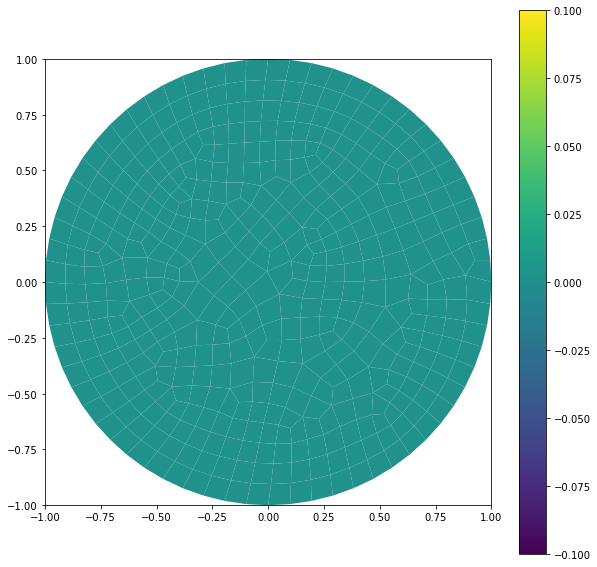

In [32]:
## PLOT mesh
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,10))
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_aspect('equal')
patches1 = []
colors1 = np.zeros((n_elem))
for i in range(n_elem):
    n1 = elements[i,0]
    n2 = elements[i,1]
    n3 = elements[i,2]
    n4 = elements[i,3]
    polygon = Polygon([node_x[n1],node_x[n2],node_x[n3],node_x[n4]], closed=True)
    patches1.append(polygon)
    colors1[i] = 0.0
p1 = PatchCollection(patches1)
p1.set_array(colors1)
ax1.add_collection(p1)
plt.colorbar(p1,ax=ax1)